In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

# 필터의 가중치

- 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할
    - 예) 물건의 테두리같은 특징적인 부분의 가중치는 높고 그 외 영역은 가중치가 낮게

In [3]:
# 저장해둔 CNN 모델 불러오기
model = keras.models.load_model("./model/best-cnn-model.keras")

In [4]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [5]:
# 첫 번째 합성곱 층의 가중치 확인
conv = model.layers[0]

In [12]:
conv.weights[0][0]

<tf.Tensor: shape=(3, 1, 32), dtype=float32, numpy=
array([[[-1.83902248e-05,  9.33943242e-02,  1.41836092e-01,
         -1.97495818e-01, -9.82020423e-02,  1.08533114e-01,
          3.09510976e-02,  2.41920814e-01, -1.38823807e-01,
         -7.63700693e-04,  1.01136453e-01,  1.54547960e-01,
          1.81356773e-01,  1.40534705e-02,  2.11521655e-01,
          6.26470968e-02, -7.17332214e-02,  1.37281388e-01,
         -1.32977813e-01,  4.76686619e-02, -4.28751111e-02,
         -2.36491293e-01,  2.24927187e-01, -2.80358166e-01,
          2.88253099e-01,  2.31783241e-01,  8.67719129e-02,
         -2.94104397e-01, -1.41434774e-01, -1.65610850e-01,
          3.73359732e-02,  7.24064857e-02]],

       [[ 4.93518747e-02, -5.89621179e-02,  2.10714310e-01,
          3.08034029e-02,  1.38062209e-01, -4.77109969e-01,
         -1.79501101e-01, -2.20895350e-01,  3.22598279e-01,
         -1.42405391e-01, -2.66225636e-01, -7.45617077e-02,
          4.37266789e-02, -6.61058187e-01, -4.54082996e-01,
  

- conv.weights[0]
    - 가중치
    - 가중치의 크기
        - 커널의 크기 : (3, 3, 1)
        - 필터의 개수 : 32
        
- conv.weights[1]
    - 절편의 개수 = 필터의 개수

In [13]:
conv_weights = conv.weights[0].numpy()
conv_weights

array([[[[-1.83902248e-05,  9.33943242e-02,  1.41836092e-01,
          -1.97495818e-01, -9.82020423e-02,  1.08533114e-01,
           3.09510976e-02,  2.41920814e-01, -1.38823807e-01,
          -7.63700693e-04,  1.01136453e-01,  1.54547960e-01,
           1.81356773e-01,  1.40534705e-02,  2.11521655e-01,
           6.26470968e-02, -7.17332214e-02,  1.37281388e-01,
          -1.32977813e-01,  4.76686619e-02, -4.28751111e-02,
          -2.36491293e-01,  2.24927187e-01, -2.80358166e-01,
           2.88253099e-01,  2.31783241e-01,  8.67719129e-02,
          -2.94104397e-01, -1.41434774e-01, -1.65610850e-01,
           3.73359732e-02,  7.24064857e-02]],

        [[ 4.93518747e-02, -5.89621179e-02,  2.10714310e-01,
           3.08034029e-02,  1.38062209e-01, -4.77109969e-01,
          -1.79501101e-01, -2.20895350e-01,  3.22598279e-01,
          -1.42405391e-01, -2.66225636e-01, -7.45617077e-02,
           4.37266789e-02, -6.61058187e-01, -4.54082996e-01,
           1.44377738e-01, -8.65330994

In [14]:
print(conv_weights.mean(), conv_weights.std())

-0.008481504 0.22648881


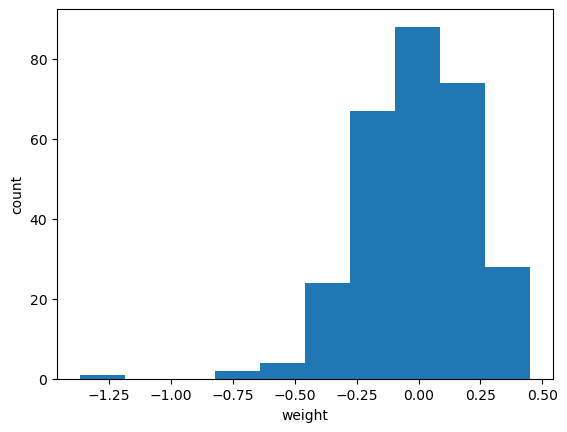

In [15]:
# 가중치 히스토그램
plt.figure()

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

- 0을 중심으로 한 종 모양의 분포가 가장 이상적인 형태

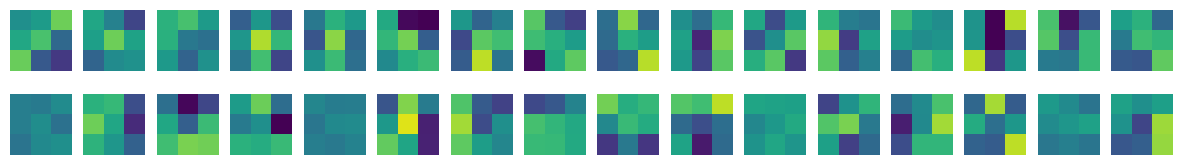

In [22]:
# 32개의 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")
        
plt.show()

- 밝은 부분이 높은 값
    - 가중치가 높은 영역에 이미지가 겹치면 크게 활성화됨
        - 예) 오른쪽 세로로 한 줄의 가중치가 높다면 오른쪽에 놓인 직선을 만나면 크게 활성화
        
- i : 행 인덱스(0 ~ 1)
- j : 열 인덱스(0 ~ 15)
    - conv_weights[:, :, 0, 0] 부터 conv_weights[:, :, 0, 31] 까지 출력
    
- imshow()
    - 배열의 최댓값과 최솟값으로 픽셀의 강도를 표현
        - 배열의 최댓값은 가장 밝은색으로
        - 배열의 최솟값은 가장 어두운 색으로 표현
        
    - vmax, vmin
        - 컬러맵으로 표현할 색의 범위 지정

# 훈련하지 않은 빈 합성곱 신경망과 비교

In [24]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (28, 28, 1)))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
# 훈련하지 않은 빈 합성곱 층의 가중치를 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [28]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0023293681 0.08216759


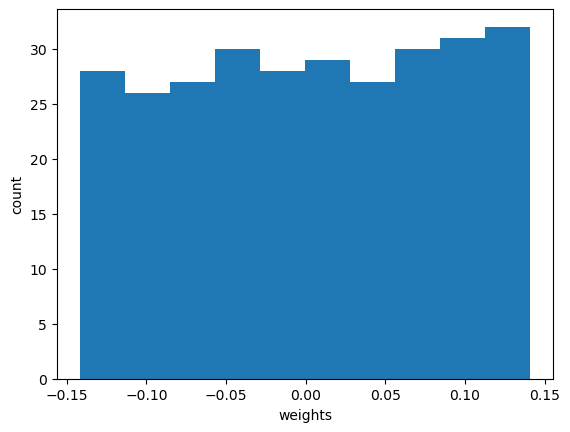

In [30]:
# 빈 합성곱 층 히스토그램
plt.figure()
plt.hist(no_training_weights.reshape(-1, 1))

plt.xlabel("weights")
plt.ylabel("count")
plt.show()

- 대부분의 가중치가 -0.15 부터 0.15까지 고르게 분포함
    - 텐서플로에서 가중치를 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문에

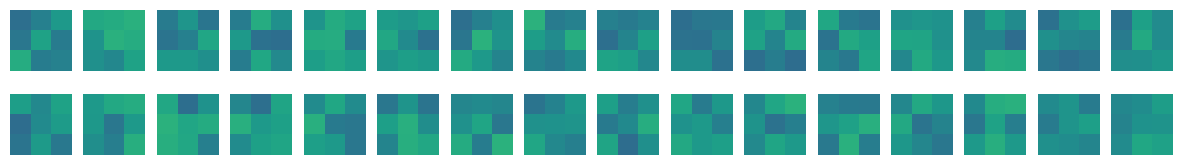

In [31]:
# 32개 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")
        
plt.show()

- 훈련된 모델에 비해 패턴이 뚜렷하지 않음

# 케라스의 함수형 API

- Sequential 클래스 : 층을 차례대로 쌓은 단순한 모델을 구성
- 복잡한 모델은 구성하기 힘들기 때문에 함수형 API(functional API)를 사용
- 케라스의 Model 클래스를 사용하여 모델을 생성
- layers 객체를 함수처럼 호출하여 동작

## 함수형 API로 다층 퍼셉트론 모델 구현 예제

In [32]:
# 입력층 생성
inputs = keras.Input(shape = (784,))

- Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출
- Model 클래스는 입력층을 수동으로 만들어서 호출해야 함

In [33]:
# 은닉층과 출력층 객체 생성
dense1 = keras.layers.Dense(100, activation = "sigmoid")
dense2 = keras.layers.Dense(10, activation = "softmax")

In [34]:
# 은닉층 호출
hidden = dense1(inputs)

- inputs 를 Dense층에 통과시킨 후 출력값 hidden 을 만드는 구조 생성

In [35]:
# 출력층 호출
outputs = dense2(hidden)

In [36]:
# 모델 클래스로 inputs와 outputs를 연결
test_model = keras.Model(inputs, outputs)

In [37]:
test_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 합성곱 신경망 모델 특성맵 시각화

- 함수형 API를 이용해 첫 번째 합성곱 층의 출력(특성맵)을 시각화

In [43]:
# 합성곱 모델의 입력
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [44]:
# 합성곱층과 입력층의 함수형 API로 연결
conv_acti = keras.Model(model.inputs, model.layers[0].output)

In [45]:
conv_acti.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

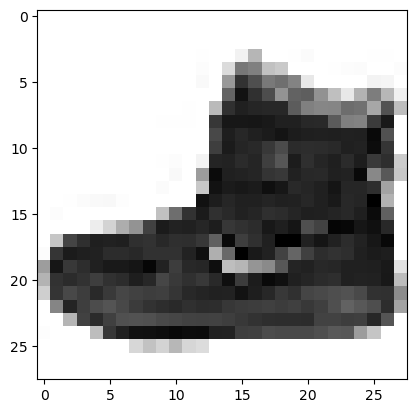

In [47]:
plt.figure()
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [48]:
# 위ㅡ이 데이터를 첫 번째 합성곱 층에 통과
inputs = x_train[[0]].reshape(-1, 28, 28, 1) / 255

In [49]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [50]:
print(feature_maps.shape)

(1, 28, 28, 32)


- 세임 패딩과 32개의 필터를 사용한 합성곱층의 출력이기 때문에 (28, 28, 32)
- 첫 번째 차원은 배치 차원
    - 샘플 하나만 입력했기 때문에 1

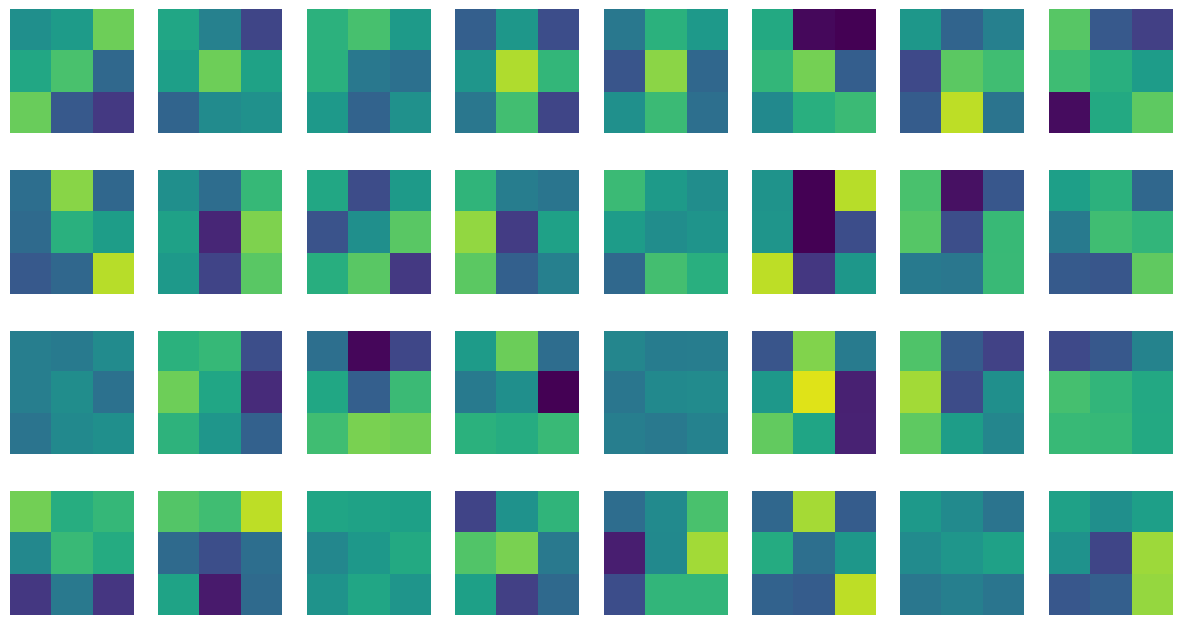

In [55]:
# 32개의 특성맵을 모두 시각화
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 8 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")
        
plt.show()

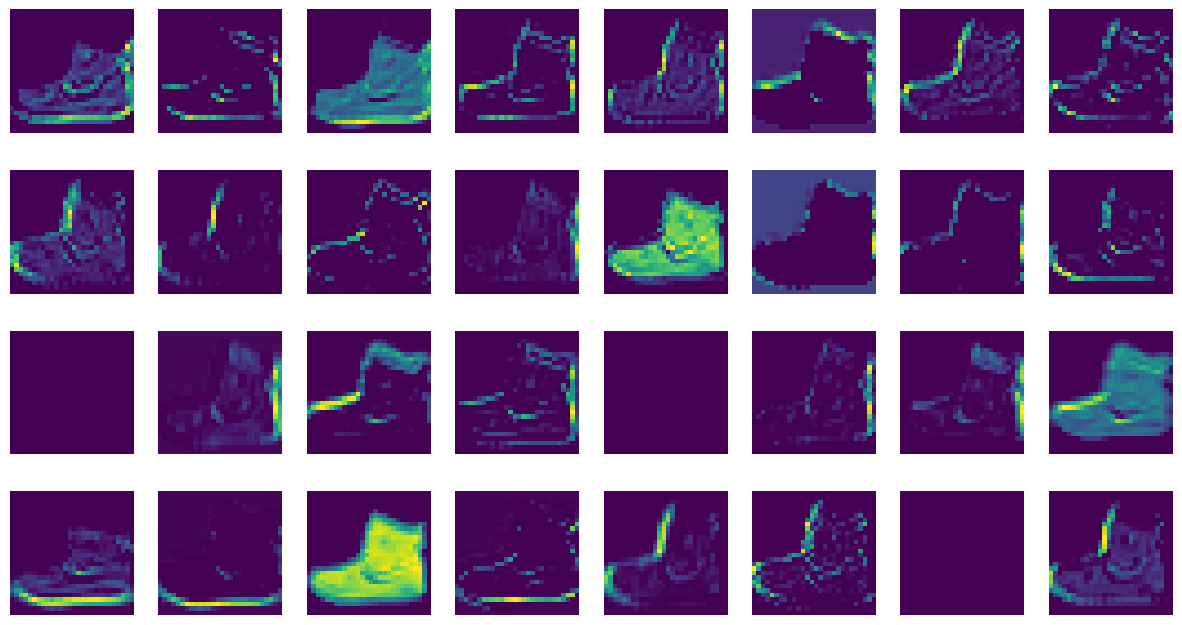

In [56]:
# 32개 커널을 모두 시각화
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis("off")
        
plt.show()

- 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분들을 시각화
    - 필터가 수직선을 감지한다면 수직선 부분이 강하게 활성화
    - 전체적으로 모두 감지하는 필터는 아이템의 전체를 활성화
    - 전체적으로 음수값인 필터는 배경과 같은 0에 가까운 값과 곱해지면 작은 음수, 큰 수가 곱해지면 큰 음수가 됨
        - 배경을 잘 활성화

In [60]:
# 두 번째 합성곱 층의 특성 맵 확인
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [62]:
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [63]:
print(feature_maps.shape)

(1, 14, 14, 64)


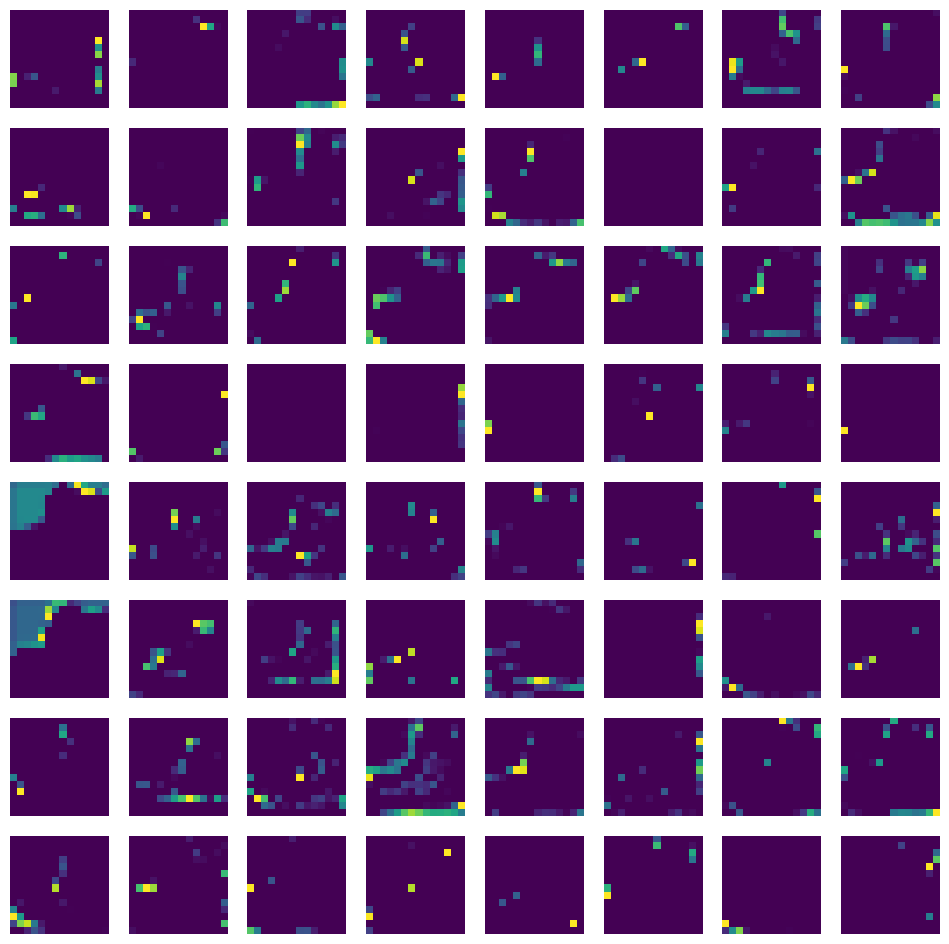

In [66]:
# 32개의 특성맵을 모두 시각화
fig, axs = plt.subplots(8, 8, figsize = (12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis("off")
        
plt.show()

- 특성맵을 시각적으로 이해하기 난해함
    - 합성곱 층을 많이 쌓을수록 난해해짐
    - 앞부분의 합성곱 층은 이미지의 시각적인 정보를 감지하고
    - 뒷부분의 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습

## 풀링 결과물 비교

In [67]:
pool_model = keras.Model(model.inputs, model.layers[1].output)

In [68]:
pool_feature_maps = pool_model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [69]:
print(pool_feature_maps.shape)

(1, 14, 14, 32)


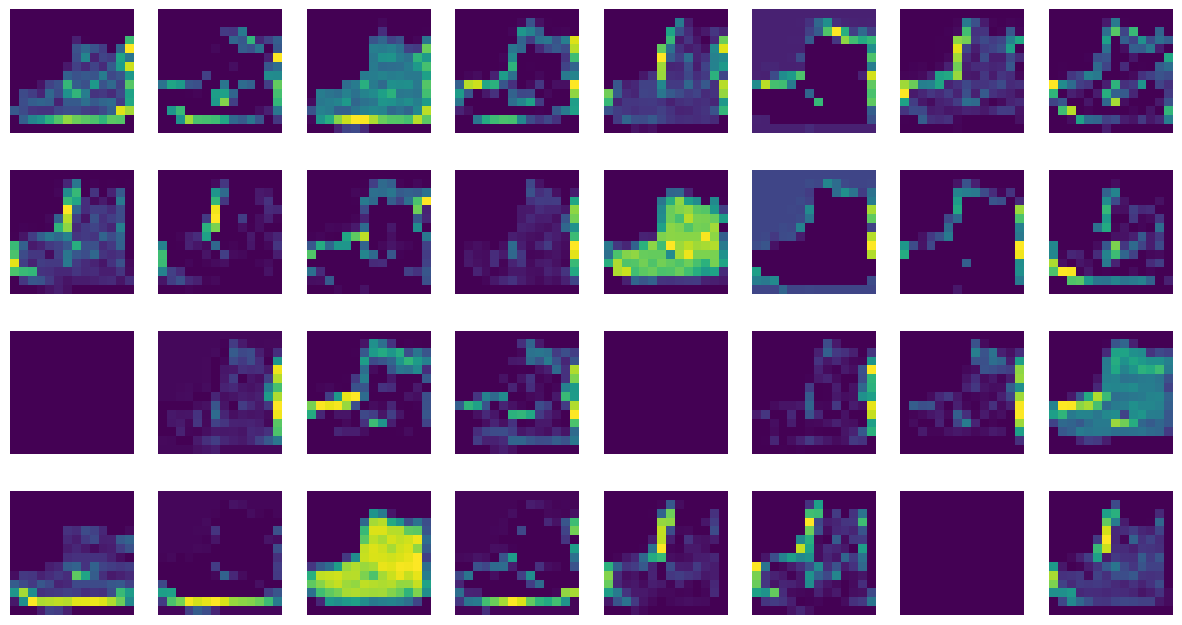

In [70]:
# 32개 커널을 모두 시각화
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(pool_feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis("off")
        
plt.show()